#  KNN : 두 Feature의 범위가 상이할 때

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#### 데이터 ) 각 영화 별 웃는 횟수와 우는 횟수

| 영화 제목 | the number of smile | The number of cry | Type |
| ------  | ----| ----| --- |
| A | 120 | 3 | comedy |
| B | 105 | 2 | comedy |
| C | 25 | 12 | drama |
| D | 32 | 15 | drama |
| E | 17 | 9  | drama |
| F | 98 | 5  | comedy |
| G | 130 | 1 | comedy |
| H | 0  | 16 | drama  |
| I | 40 | 20 | drama |

In [0]:
dataset_ = np.array([
    [120, 3],
    [105, 2],
    [25, 12],
    [32, 15],
    [17, 9],
    [98, 5],
    [130, 1],
    [0, 16],
    [40, 20],
    [100, 10]
])

labels = np.array(["comedy", "comedy", "drama",
                   "drama","drama","comedy","comedy",
                   "drama","drama","comedy"])

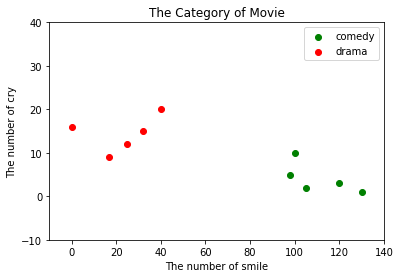

In [41]:
plt.title("The Category of Movie")
plt.scatter(dataset[labels=="comedy",0],dataset[labels=="comedy",1],
            label='comedy', c='g')
plt.scatter(dataset[labels=="drama",0],dataset[labels=="drama",1],
            label='drama', c='r')

plt.xlim(-10,140)
plt.ylim(-10,40)

plt.xlabel('The number of smile')
plt.ylabel('The number of cry')
plt.legend()
plt.show()

In [44]:
graph = tf.Graph()
with graph.as_default():
    inX_tf = tf.placeholder(tf.float32, shape=(2), name='inX')
    dataset_tf = tf.placeholder(tf.float32, shape=(None,2), name='dataset')
    labels_tf = tf.placeholder(tf.string, shape=(None,), name='labels')
    K_tf = tf.placeholder_with_default(4,(),name='K')
    
    tf_sub = tf.subtract(inX_tf, dataset_tf, name="sub")
    tf_squ = tf.square(tf_sub, name="square")
    tf_sum = tf.reduce_sum(tf_squ, axis=1, name='sum')
    tf_sqrt = tf.sqrt(tf_sum, name="sqrt")
    
    #거리에 대해 인덱스 정렬 반환
    arg_sort = tf.argsort(tf_sqrt, axis = -1, name = 'arg_sorted')
    
    #인덱스 기반 labels_tf 서치
    gath_tf = tf.gather(params = labels_tf, indices = arg_sort)
    
    la_sa = tf.rank(labels_tf)
    ar_sa = tf.rank(arg_sort)
    slice_tf = gath_tf[:K_tf] #tf.slice(gath_tf, [0], K_tf)   
    y, idx, count = tf.unique_with_counts(slice_tf)
    output = tf.gather(y, tf.argmax(count))
    
    with tf.Session(graph = graph) as sess :
        sess.run(tf.global_variables_initializer())
        y_, output_= sess.run([y, output],  feed_dict={inX_tf:[60,0],
                           dataset_tf: dataset,
                           labels_tf: labels})
        print(output_)

b'drama'


- 우는 횟수가 단 한번도 발생하지 않았지만, 이를 drama로 판단하는 잘못된 결과를 반환함

- 로맨스 영화의 특징상 웃는 횟수의 값의 범위와 우는 횟수의 값의 범위가 매우 상이함 => 즉, 각 Feature의 범위가 매우 상이함

-  Train 데이터에 대해 Standarization 수행, 이때 test data도 같은 mean, stddev로 scaling수행함



In [45]:
graph2 = tf.Graph()
with graph2.as_default():
    inX_tf = tf.placeholder(tf.float32, shape=(2), name='inX')
    dataset_tf = tf.placeholder(tf.float32, shape=(None,2), name='dataset')
    labels_tf = tf.placeholder(tf.string, shape=(None,), name='labels')
    K_tf = tf.placeholder_with_default(4,(),name='K')
    
    #dataset standardization#
    mean_ = tf.reduce_mean(dataset_tf, axis=0)
    std_ = tf.math.reduce_std(dataset_tf, axis=0)
    dataset_std = (dataset_tf - mean_) / std_       
    #input standardization                                        
    inX_std = (inX_tf - mean_) / std_
    
    #거리계산
    tf_sub = tf.subtract(inX_std, dataset_std, name="sub")
    tf_squ = tf.square(tf_sub, name="square")
    tf_sum = tf.reduce_sum(tf_squ, axis=1, name='sum')
    tf_sqrt = tf.sqrt(tf_sum, name="sqrt")
    
    #거리에 대해 인덱스 정렬 반환
    arg_sort = tf.argsort(tf_sqrt, axis = -1, name = 'arg_sorted')
    
    #인덱스 기반 labels_tf 서치
    gath_tf = tf.gather(params = labels_tf, indices = arg_sort)
    
    la_sa = tf.rank(labels_tf)
    ar_sa = tf.rank(arg_sort)
    slice_tf = gath_tf[:K_tf] #tf.slice(gath_tf, [0], K_tf)   
    y, idx, count = tf.unique_with_counts(slice_tf)
    output = tf.gather(y, tf.argmax(count))
    
    with tf.Session(graph = graph2) as sess :
        sess.run(tf.global_variables_initializer())
        y_, output_= sess.run([y, output],
                           feed_dict={inX_tf: [60,0],
                           dataset_tf: dataset_,
                           labels_tf: labels})
        print(output_)

b'comedy'


- 정상적으로 comedy 결과 반환